![](https://briefingpapers.co.nz/wp-content/uploads/2017/05/1.-Brian-Easton-house-price-inflation-PS.jpg)

# **STEP 1 : Loading the libraries 📚 & the dataset**

# **STEP 2 : Data Visualization📊📈**

# **STEP 3 : Preprocessing the dataset 🔧**

# **STEP 4 : Transforming and engineering features**

# **STEP 5 : Model Building**

  ## STEP 1 : Loading the libraries 📚  & the dataset

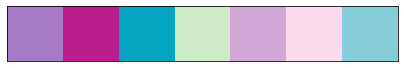

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew
from scipy import stats
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go




#Model Building

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error


# Color Palette

custom_colors = ["#A67BC5","#BB1C8B","#05A4C0",'#CCEBC5',"#D2A7D8",'#FDDAEC',  "#85CEDA",]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

# Set size

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)



* **Dataset**

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

* **Overview of the features**

Here's a brief version of what you'll find in the data description file.

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

* **MSSubClass**: The building class

* **MSZoning**: The general zoning classification

* **LotFrontage**: Linear feet of street connected to property

* **LotArea**: Lot size in square feet

* **Street**: Type of road access

* **Alley**: Type of alley access

* **LotShape**: General shape of property

* **LandContour**: Flatness of the property

* **Utilities**: Type of utilities available

* **LotConfig**: Lot configuration

* **LandSlope**: Slope of property

* **Neighborhood**: Physical locations within Ames city limits

* **Condition1**: Proximity to main road or railroad

* **Condition2**: Proximity to main road or railroad (if a second is present)

* **BldgType**: Type of dwelling

* **HouseStyle**: Style of dwelling

* **OverallQual**: Overall material and finish quality

* **OverallCond**: Overall condition rating

* **YearBuilt**: Original construction date

* **YearRemodAdd**: Remodel date

* **RoofStyle**: Type of roof

* **RoofMatl**: Roof material

* **Exterior1st**: Exterior covering on house

* **Exterior2nd**: Exterior covering on house (if more than one material)

* **MasVnrType**: Masonry veneer type

* **MasVnrArea**: Masonry veneer area in square feet

* **ExterQual**: Exterior material quality

* **ExterCond**: Present condition of the material on the exterior

* **Foundation**: Type of foundation

* |**BsmtQual**: Height of the basement

* **BsmtCond**: General condition of the basement

* **BsmtExposure**: Walkout or garden level basement walls

* **BsmtFinType1**: Quality of basement finished area

* **BsmtFinSF1**: Type 1 finished square feet

* **BsmtFinType2**: Quality of second finished area (if present)

* **BsmtFinSF2**: Type 2 finished square feet

* **BsmtUnfSF**: Unfinished square feet of basement area

* **TotalBsmtSF**: Total square feet of basement area

* **Heating**: Type of heating

* **HeatingQC**: Heating quality and condition

* **CentralAir**: Central air conditioning

* **Electrical**: Electrical system

* **1stFlrSF**: First Floor square feet

* **2ndFlrSF**: Second floor square feet

* **LowQualFinSF**: Low quality finished square feet (all floors)

* **GrLivArea**: Above grade (ground) living area square feet

* **BsmtFullBath**: Basement full bathrooms

* **BsmtHalfBath**: Basement half bathrooms

* **FullBath**: Full bathrooms above grade

* **HalfBath**: Half baths above grade

* **Bedroom**: Number of bedrooms above basement level

* **Kitchen**: Number of kitchens

* **KitchenQual**: Kitchen quality

* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

* **Functional**: Home functionality rating

* **Fireplaces**: Number of fireplaces

* **FireplaceQu**: Fireplace quality

* **GarageType**: Garage location

* **GarageYrBlt**: Year garage was built

* **GarageFinish**: Interior finish of the garage

* **GarageCars**: Size of garage in car capacity

* **GarageArea**: Size of garage in square feet

* **GarageQual**: Garage quality

* **GarageCond**: Garage condition

* **PavedDrive**: Paved driveway

* **WoodDeckSF**: Wood deck area in square feet

* **OpenPorchSF**: Open porch area in square feet

* **EnclosedPorch**: Enclosed porch area in square feet

* **3SsnPorch**: Three season porch area in square feet

* **ScreenPorch**: Screen porch area in square feet

* **PoolArea**: Pool area in square feet

* **PoolQC**: Pool quality

* **Fence**: Fence quality

* **MiscFeature**: Miscellaneous feature not covered in other categories

* **MiscVal**: $Value of miscellaneous feature

* **MoSold**: Month Sold

* **YrSold**: Year Sold

* **SaleType**: Type of sale

* **SaleCondition**: Condition of sale

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 ## **STEP 2 : Data Visualization📊📈**

* Scatter Plot 
* Bar Plot
* Pie Plot
* scatter_matrix

In [4]:
# command for work offline
plotly.offline.init_notebook_mode(connected=True)

- ## **MasVnrArea vs SalePrice**

In [5]:
fig = px.scatter(train, x='MasVnrArea' , y='SalePrice')
fig.show()

- ## **TotRmsAbvGrd vs SalePrice**

In [6]:
fig = px.scatter(train, x='TotRmsAbvGrd' , y='SalePrice')
fig.show()

* ## **LotFrontage vs SalePrice**

In [7]:
fig = px.scatter(train, x="LotFrontage" , y="SalePrice")
fig.show()

- ## **TotalBsmtSF vs SalePrice**

In [8]:
fig = px.scatter(train, x="TotalBsmtSF" , y="SalePrice")
fig.show()

- ## **YearBuilt vs SalePrice**

In [9]:
fig = px.bar(train, x="YearBuilt", y="SalePrice",
              barmode='group',
             height=600)
fig.show()

- ## **YearRemodAdd vs SalePrice**

In [10]:
fig = px.bar(train, x="YearRemodAdd", y="SalePrice",
              barmode='group',
             height=600, color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

- ## **Sale Price vs 2nd floor in sq feet**

In [11]:
N = 2000

In [12]:
train_x = train["2ndFlrSF"]
train_y = train["SalePrice"]
colors = np.random.rand(2938)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x = train_x,
                y = train_y,
                mode = 'markers',
                marker = {'size': sz,
                         'color': colors,
                         'opacity': 0.6,
                         'colorscale': 'Portland',
                          
                       })

plotly.offline.iplot(fig)

- ## **Quality of basement finished area**

In [13]:
fig = px.pie(train, names = "BsmtFinType1", title = "Quality of basement finished area", color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

- ## **Garage location**

In [14]:
fig = px.pie(train, names = "GarageType", title = "Garage location", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

- ## **Type of sale**

In [15]:
fig = px.pie(train, names = "SaleType", title = "Type of sale", color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

- ## **Condition of sale**

In [16]:
fig = px.pie(train, names = "SaleCondition", title = "Condition of sale")
fig.show()

- ## **MSSubClass vs SalePrice**

In [17]:
fig =px.bar(train,x='ExterQual', y='SalePrice',barmode='group',
             height=600)
fig.show()

- ## **MSZoning vs SalePrice**

In [18]:
fig =px.bar(train,x='MSZoning', y='SalePrice',barmode='group',
             height=800, color_discrete_sequence=["fuchsia"])

fig.show()

- ## **Scatterplot matrices** 

In [19]:
fig = px.scatter_matrix(train, dimensions=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'])
fig.show()

## **Histogram for each numerical attribute**

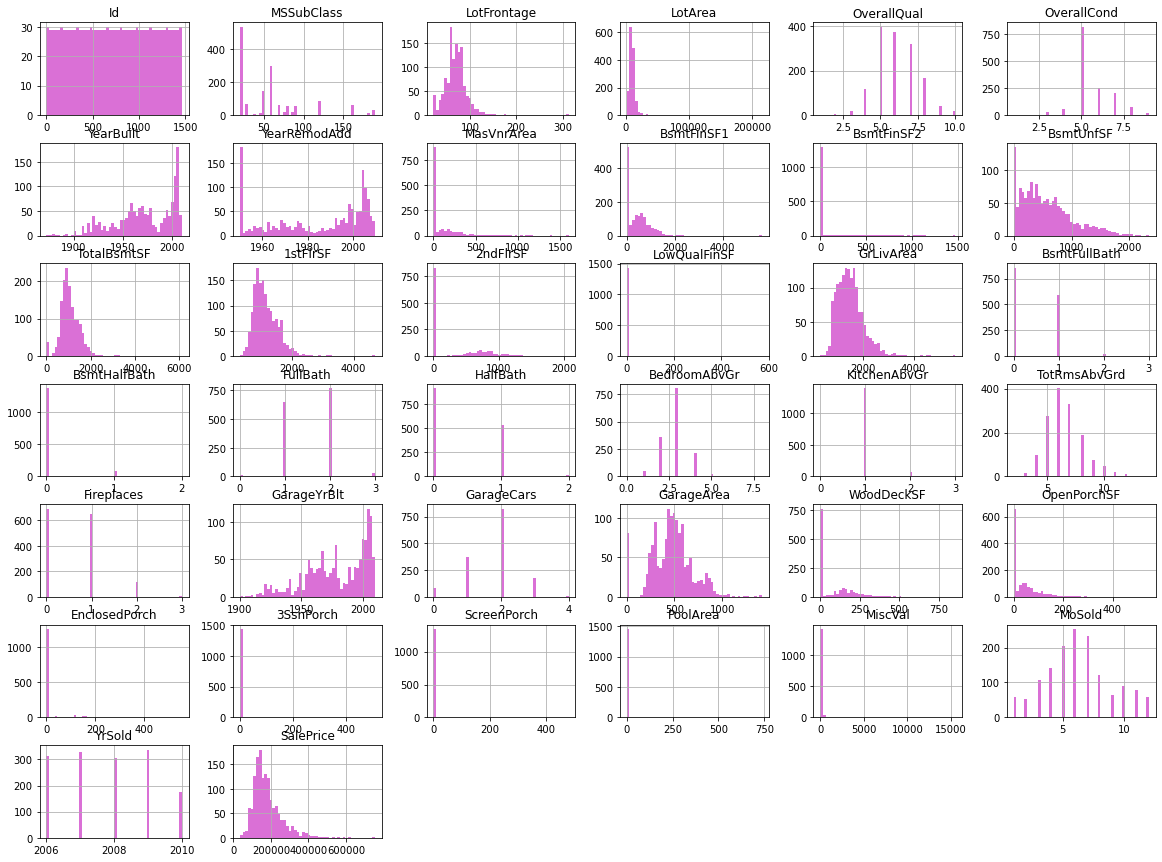

In [20]:
train.hist(bins=50, figsize=(20,15), color='orchid')
plt.show()

## STEP 3: Preprocessing the dataset 🔧

* Checking the distribution of 'Sale Price'.

* Log Transformation of the Dependant Variable

* Detect outliers

* Clean Outliers

In [21]:
print(train.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### **Overview of the Target Variable**

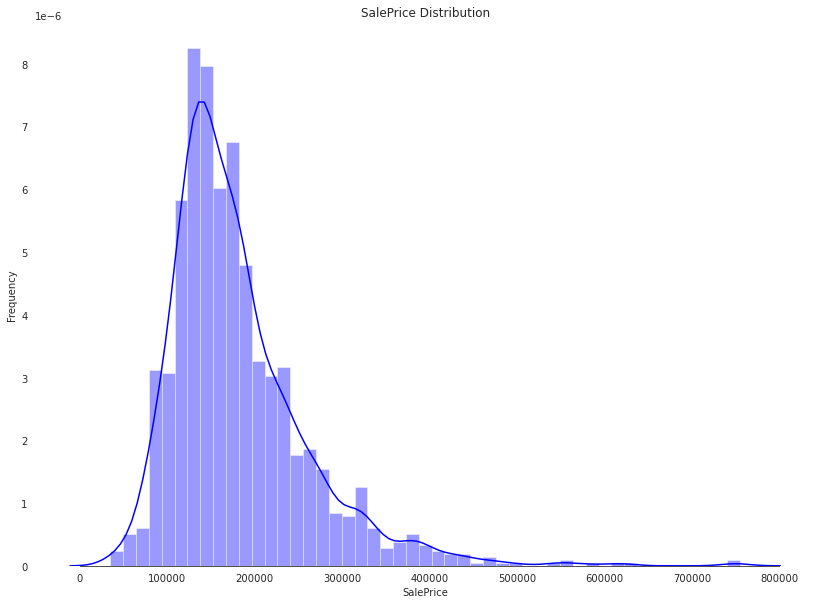

In [22]:
sns.set_style("white")
sns.set_color_codes(palette="deep")
f,ax = plt.subplots(figsize=(14,10))

sns.distplot(train['SalePrice'], color="Blue" )
ax.set(ylabel = "Frequency")
ax.set(xlabel = "SalePrice")
ax.set(title = "SalePrice Distribution" )
sns.despine(trim=True, left=True)
plt.show()



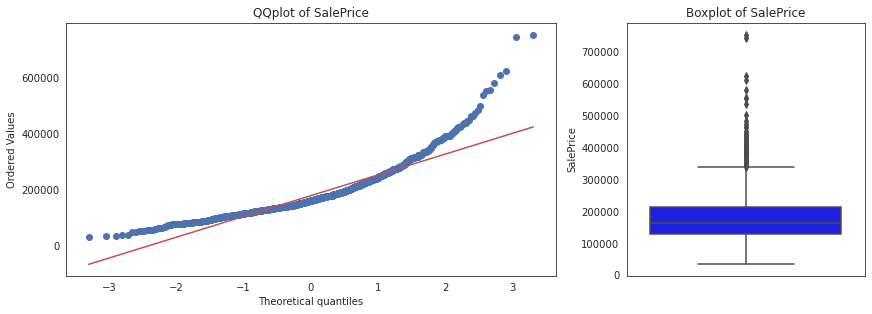

In [23]:
fig = plt.figure(constrained_layout=True, figsize=(12,8))
grid = gridspec.GridSpec(ncols=3, nrows=4, figure=fig)
sns.set_color_codes(palette="deep")

# QQplot

ax2 = fig.add_subplot(grid[2:,:2])
stats.probplot(train['SalePrice'],plot=ax2)
ax2.set_title("QQplot of SalePrice")

 # Boxplot
    
ax3 = fig.add_subplot(grid[2:,2])
sns.boxplot(train['SalePrice'],ax=ax3,orient="v",color="Blue")
ax3.set_title("Boxplot of SalePrice")
plt.show()

###  **Skewness and the kurtosis**

- **Skewness**

![](https://i.pinimg.com/originals/c1/01/b0/c101b0da6ea1a0dab31f80d9963b0368.png)

. Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution.

. symmetrical distribution must have a skewness of 0.

. Skewness can be positive or negative.

. Positive Skewness when The mean and median will be greater than the mode.

. Negative Skewness The mean and median will be less than the mode.

- **Kurtosis**

![](https://i.pinimg.com/564x/e1/f0/b2/e1f0b20eb0773915fc6e9b91909adfa3.jpg)

. Kurtosis is the measure of outliers present in the distribution.

. There are three types of Kurtosis: Mesokurtic, Leptokurtic, and Platykurtic.

. Mesokurtic distribution indicates an excess kurtosis of zero. This means that the data has a normal distribution.

. Leptokurtic shows a positive excess kurtosis, so Leptokurtic distribution indicates heavy tails that's means the existance of large outliers .

. A Platykurtic distribution shows a negative excess kurtosis.

* **Calcul the skewness and the kurtosis**

In [24]:
print("Skewness : %f" % train['SalePrice'].skew() )
print("Kurtosis : %f" % train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


- The skewness value is 1, that means that the data are moderately skewed, and the high Kurtosis indicates that the data

  has heavy tails or outliers, so we need to investigate!

* We notice in the graph above that the variable target is right skewed, the best way to fix it is to perform a log transformation of the same data.

### **Log Transformation of the Dependant Variable(SalePrice)** 

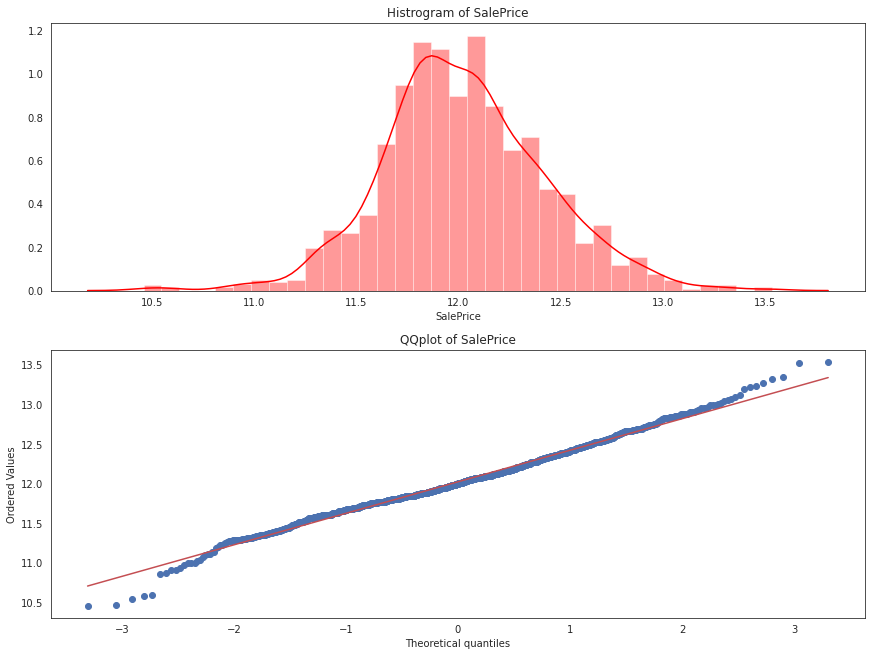

In [25]:
# In this case, We use the numpy fuction log1p which  applies log(1+x) to all elements of the column.

train['SalePrice'] = np.log1p(train['SalePrice'])
sns.set_color_codes(palette="deep")

## Visualize of SalePrice after the normalization
fig,(ax1,ax2) = plt.subplots(2,1,constrained_layout=True,figsize=(12,9))

 # Histrogram
sns.distplot(train['SalePrice'],ax=ax1, color= "red")
ax1.set_title("Histrogram of SalePrice")
 # QQplot
stats.probplot(train['SalePrice'],plot=ax2)
ax2.set_title("QQplot of SalePrice")

plt.show()

- So now the skewed seems corrected, and the data is normally distributed.

### **Discover outliers with visualization tools**

* **Before performing statistical analyses,we should identify potential outliers. According to this article [Tha author Dean De Cock ](www.amstat.org/publications/jse/v19n3/decock.pdf), there are outliers for the GR LIVE AREA, so we will visualize this feature graphically with the BoxPlot and ScatterPlot.**

A.**Box Plot**

In [26]:
trace0 = go.Box(
    name = "GrLivArea",
    y = train["GrLivArea"]
)

trace1 = go.Box(
    name = "MasVnrArea",
    y = train["MasVnrArea"]
)

trace2 = go.Box(
    name = "KitchenAbvGr",
    y = train["KitchenAbvGr"]
)

trace3 = go.Box(
    name = "BedroomAbvGr",
    y = train["BedroomAbvGr"] 
)

trace4 = go.Box(
    name = "LotFrontage",
    y = train["LotFrontage"]
)

trace5 = go.Box(
    name = "GarageCars",
    y = train["GarageCars"]
)
data = [trace0, trace1, trace2, trace3, trace4,trace5  ]
plotly.offline.iplot(data)

* **B. Scatter Plot**

In [27]:
fig = px.scatter(train, x='GrLivArea' , y='SalePrice')
fig.show()

* **As we see, there are some points which are far from the population in the top right corner.**

In [28]:
train.iloc[np.where(train.GrLivArea > 4000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534474
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521141
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935


### **Clean Outliers**

* **The presence of outliers in the dataset may affect our analysis and they can cause problems in statistical procedures. so we need to remove them.**

In [29]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,inplace=True)

* #### **After Removing Outliers**

In [30]:
fig = px.scatter(train, x='GrLivArea' , y='SalePrice')
fig.show()

## **STEP 4 : Transforming and engineering features**

* Checking the correlation

* Impute missing values

* Label Encoding

* Transform skewed attributes

* ## **Heatmap**

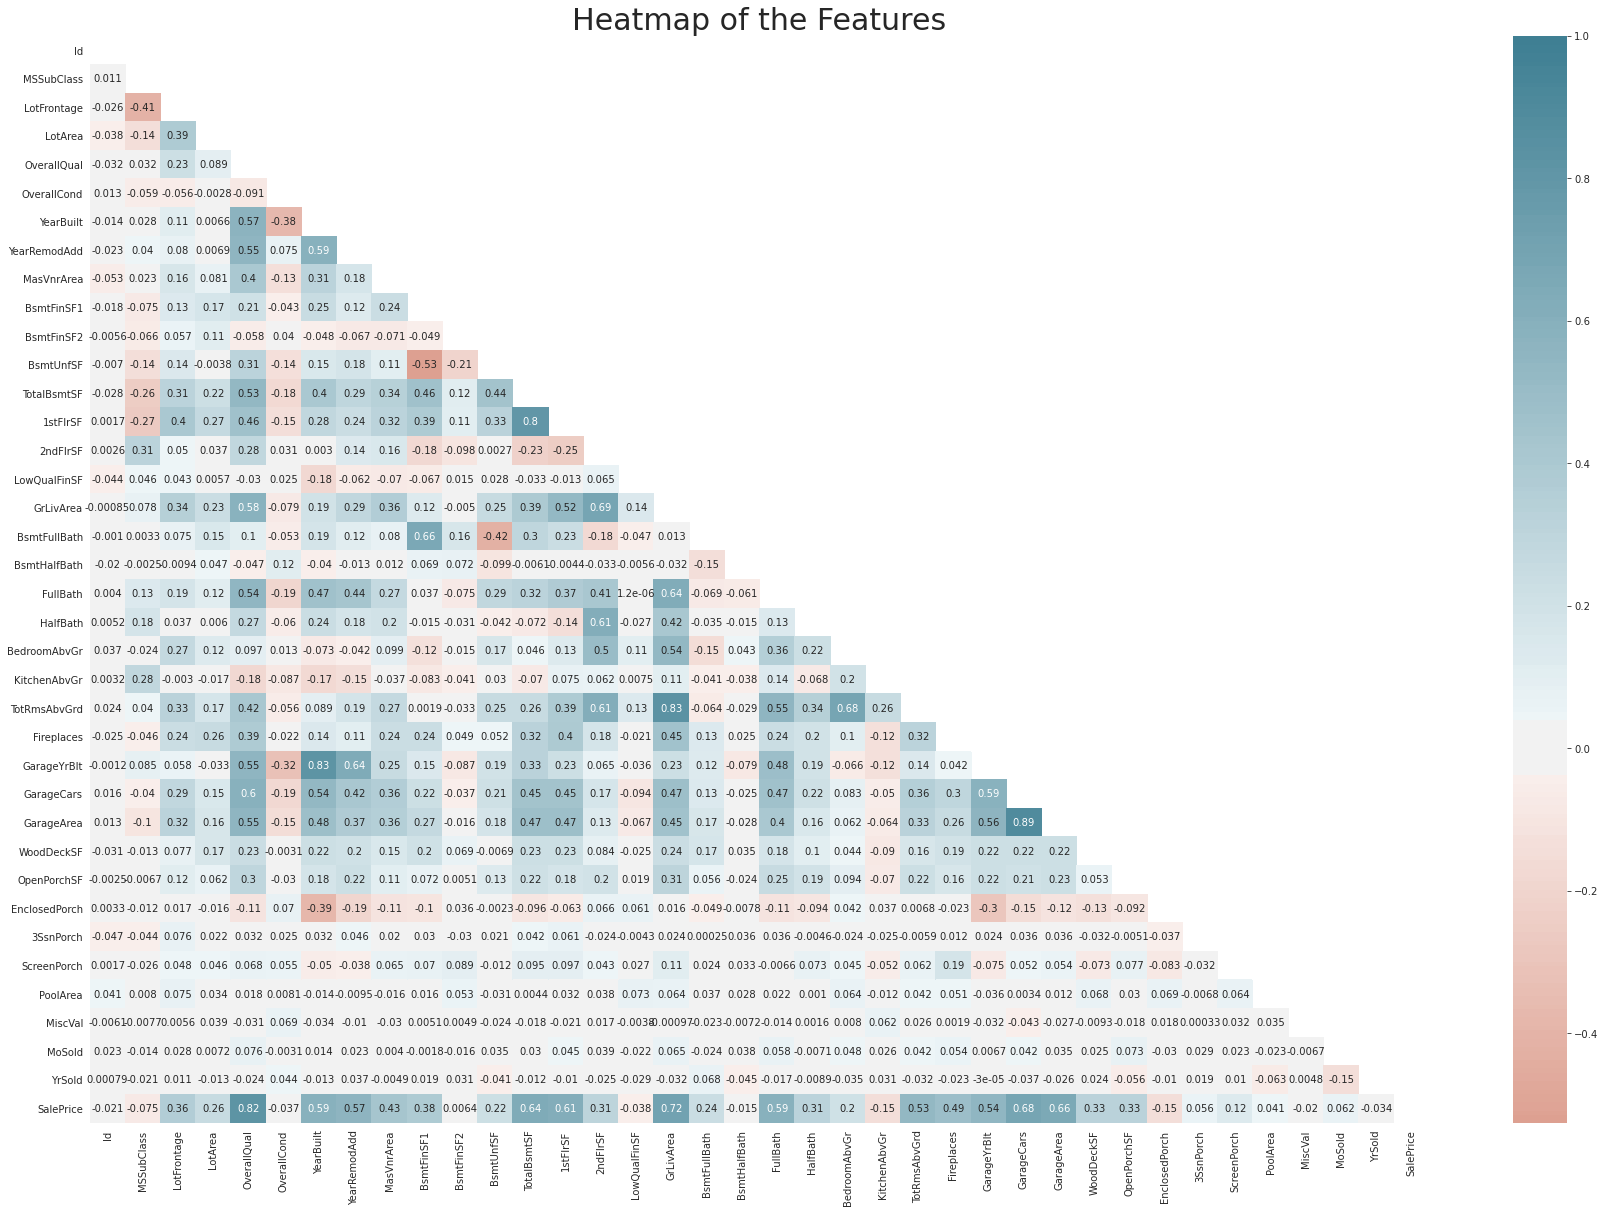

In [31]:
style.use('ggplot')
sns.set_style('whitegrid')

plt.subplots(figsize = (30,20))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
 
plt.title("Heatmap of the Features", fontsize = 30);

As we can see there is a correlation of:
    
- 83% between the TotRmsABVGr and GrLivArea
- 83% between YearBuilt and Gragae YrBlt
- 89% between GarageCars and GarageArea

* ### **Numerical and Categorical Features**

In [32]:
numerical_features = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = train.dtypes[train.dtypes == "object"].index
print("Number of categorical features:", len(categorical_features))

Number of Numerical features:  38
Number of categorical features: 43


* ### **Dealing With Missing Values**

Text(0.5, 1.0, 'Missing Values Heatmap')

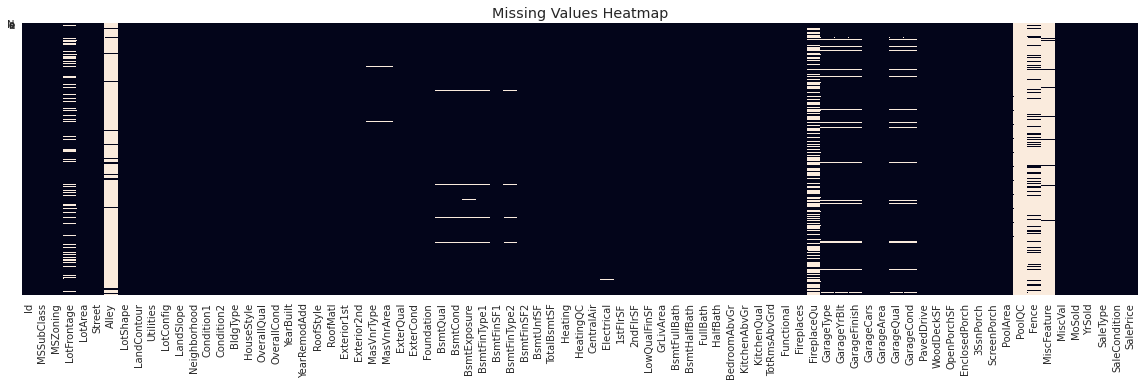

In [33]:

plt.figure(figsize=(20,5))

sns.heatmap(train.isnull(), yticklabels="None", cbar=False)
plt.title("Missing Values Heatmap")

* ##### **Check the percentage of missing values for each columns in train_data**

In [34]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1451,99.7
MiscFeature,1402,96.3
Alley,1365,93.8
Fence,1176,80.8
FireplaceQu,690,47.4
LotFrontage,259,17.8
GarageCond,81,5.6
GarageType,81,5.6
GarageYrBlt,81,5.6
GarageFinish,81,5.6


* ###### **Check the percentage of missing values for each columns in test_data**

In [35]:
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['total', 'Missing_Ratio'])
missing_data.head(20)

,total,Missing_Ratio
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageQual,78,5.3
GarageYrBlt,78,5.3
GarageFinish,78,5.3


- **LotFrontage**

In [36]:
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())

test['LotFrontage'] = test['LotFrontage'].fillna(test.LotFrontage.mean())

- Alley, PoolQC, iscFeature, Fence, GarageCond, GarageQual, GarageFinish, GarageType, FireplaceQu, BsmtExposure, 


   BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2, MasVnrType

 

In [37]:
list1 =["Alley",
                       "PoolQC",
                      "MiscFeature",
                       "Fence",
                       "GarageCond",
                       "GarageQual",
                       "GarageFinish",
                       "GarageType",
                       "FireplaceQu",
                       "BsmtExposure",
                       "BsmtCond",
                       "BsmtQual",
                       "BsmtFinType1",
                       "BsmtFinType2",
                       "MasVnrType"]
                       
for i in list1:
    
    train[i] = train[i].fillna("None")
    test[i] = test[i].fillna("None")

- MasVnrArea, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageYrBlt,GarageCars, GarageArea

In [38]:
list2 = ["MasVnrArea",
                          "BsmtFinSF1",
                          "BsmtFinSF2",
                           "BsmtUnfSF",
                          "TotalBsmtSF",
                          "BsmtFullBath",
                          "BsmtHalfBath",
                          "GarageYrBlt",
                          "GarageCars",
                          "GarageArea"]

for i in list2:
    train[i] = train[i].fillna(0)
    test[i] = test[i].fillna(0)

- Utilities, Electrical, Functional

In [39]:
train ["Utilities"]= train ["Utilities"].fillna("AllPub")
train ["Electrical"] = train ["Electrical"] .fillna("SBrkr")
train ["Functional"] = train ["Functional"] .fillna("Typ")

In [40]:
test ["Utilities"]=test ["Utilities"].fillna("AllPub")
test["Electrical"] = test["Electrical"] .fillna("SBrkr")
test ["Functional"] =test ["Functional"] .fillna("Typ")

- Exterior1st, Exterior2nd, KitchenQual, SaleType, MSZoning

In [41]:
train ["Exterior1st"]= train["Exterior1st"].fillna(train["Exterior1st"].mode()[0])
train ["Exterior2nd"]= train["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0])
train["KitchenQual"] = train["KitchenQual"] .fillna(train["KitchenQual"].mode()[0])
train["SaleType"]  =   train["SaleType"] .fillna(train["SaleType"].mode()[0])

In [42]:
test ["Exterior1st"]= test["Exterior1st"].fillna(test["Exterior1st"].mode()[0])
test ["Exterior2nd"]= test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0])
test["KitchenQual"] = test["KitchenQual"] .fillna(test["KitchenQual"].mode()[0])
test["SaleType"]  =   test["SaleType"] .fillna(test["SaleType"].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [43]:
# Some of the non-numeric predictors are stored as numbers, so we will convert them into strings.


# MSSubClass
train['MSSubClass'] = train['MSSubClass'].apply(str)
test['MSSubClass'] = test['MSSubClass'].apply(str)

# we Change OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [44]:
train.shape, test.shape

((1456, 81), (1459, 80))

* ### **Label Encoding**

In [45]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(set(train[c].unique().tolist() + test[c].unique().tolist())))
    train[c] = lbl.transform(list(train[c].values))
    test[c] = lbl.transform(list(test[c].values))

* ### **Adding new Feature**

In [46]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

* ### **Skewed Features**

- **Seperating Columns for Skew check**

In [47]:
y_train = train.SalePrice
train.drop(['SalePrice','Id'],axis=1,inplace=True)
test_Ids = test['Id']
test.drop('Id',axis=1,inplace=True)

- **Check the skew of all numerical features in train set**

In [48]:
numeric_f = train.dtypes[train.dtypes != "object"].index

skewed_f = train[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in train data' :skewed_f})
skewness.head(10)

,Skew in train data
MiscVal,24.418175
PoolArea,17.504556
LotArea,12.574590
3SsnPorch,10.279262
LowQualFinSF,8.989291
LandSlope,4.801326
KitchenAbvGr,4.476748
BsmtFinSF2,4.244209
BsmtHalfBath,4.124712
ScreenPorch,4.111400


- **Transforming train Data**

In [49]:

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features in train data to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)

There are 59 skewed numerical features in train data to Box Cox transform


- **Check the skew of all numerical features in test set**

In [50]:
numeric_f = test.dtypes[test.dtypes != "object"].index


skewed_f = test[numeric_f].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew in test data' :skewed_f})
skewness.head(10)

,Skew in test data
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
LandSlope,4.963280
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796
ScreenPorch,3.784349
BsmtHalfBath,3.779085


- **Transforming test Data**

In [51]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features in test data to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    test[feat] = boxcox1p(test[feat], lam)

There are 59 skewed numerical features in test data to Box Cox transform


* #### **Getting Dummy Variables**

In [52]:

train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Balancing DataSets

missing_cols = set(train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0  

missing_cols = set(test.columns) - set(train.columns)
for c in missing_cols:
    train[c] = 0
    
test = test[train.columns.tolist()]

# Checking Shapes
train.shape,test.shape

((1456, 222), (1459, 222))

# STEP 5: Model Building

* Splitting the data

* Define the validation function

* Modeling the base Models and the stacking model.

* Calculating the Scores of Base models

* Fitting the models

* Blending Models


* #### **Splitting the data**

In [53]:
X = train
Y = y_train

# Partition the dataset in train + validation sets

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.33, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (975, 222)
X_test : (481, 222)
y_train : (975,)
y_test : (481,)


* ### **Validation function**

In [54]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

* ### **Base models**

In [55]:
alphas_r =[12.3, 14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas1 = [1.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas2 = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 1.0]
l1ratio_en = [0.6, 0.8, 0.85, 0.9, 0.95, 0.99, 1]

* **Ridge**

In [56]:
Ridge = make_pipeline(RobustScaler(), RidgeCV(alphas= alphas_r, cv=kfolds))

* **Lasso**

In [57]:
Lasso = make_pipeline(RobustScaler(), LassoCV(alphas =alphas1, max_iter=2000,cv=kfolds, random_state= 45))

* **ElasticNet**

In [58]:
ElasNet = make_pipeline(RobustScaler(), ElasticNetCV(alphas=alphas2, max_iter=1e7,cv=kfolds, l1_ratio=l1ratio_en))


* **Gradient Boosting Regressor**

In [59]:
GBR = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05, max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=45
      ,max_features= 'sqrt', loss='huber')

* **XGB Regressor**

In [60]:
XGBoost = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 3400)

* **Support Vector Regressor**

In [61]:
SVR = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

* **light gbm**

In [62]:
LGBM = LGBMRegressor(objective='regression', 
                                       num_leaves=5,
                                       learning_rate=0.05, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
)

### Stacked Regressor

In [63]:
Stack_reg= StackingCVRegressor (regressors = (Ridge, Lasso, ElasNet, GBR, LGBM),
                               meta_regressor= XGBoost,
                               use_features_in_secondary=True)

* ### **Calculating the Scores of Base models**

In [64]:

score = cv_rmse(Ridge)
score = cv_rmse(Lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7863473588197483, tolerance: 0.01834309762588616

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5345952394811135, tolerance: 0.0181213487378757

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7864717851423801, tolerance: 0.01861794492996395



LASSO: 0.1112 (0.0106)



In [65]:

score = cv_rmse(ElasNet)
print("Elastic Net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Elastic Net: 0.1112 (0.0106)



In [66]:

score = cv_rmse(SVR)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

SVR: 0.1122 (0.0117)



In [67]:
score = cv_rmse(XGBoost)
print("XGBoost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[12:00:39] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:46] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:46] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:54] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:00:54] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:01] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:01] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:01:09] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of re

In [68]:

score = cv_rmse(GBR)
print("GBR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

GBR: 0.1140 (0.0151)



In [69]:

score = cv_rmse(LGBM)
print("LGBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGBM: 0.1176 (0.0130)



* ## **Fitting the models**

In [70]:
print('stacking_model')

stacking_model = Stack_reg.fit(np.array(X), np.array(Y))

stacking_model
[12:06:30] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:06:39] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:

print('ElasticNet')

ElasNet_model = ElasNet.fit(X, Y)

ElasticNet


In [72]:
print('lasso')
lasso_model = Lasso.fit(X, Y)

lasso


In [73]:
print('Ridge')
Ridge_model = Ridge.fit(X, Y)

Ridge


In [74]:

print('Svr')
SVR_model = SVR.fit(X, Y)

Svr


In [75]:
print('GradientBoosting')
GBR_model = GBR.fit(X, Y)

GradientBoosting


In [76]:
print('xgboost')

XGBoost_model = XGBoost.fit(X, Y)

xgboost
[12:07:28] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:36] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [77]:
print('lightgbm')
LGBM_model = LGBM.fit(X, Y)

lightgbm


* ## **Blending Models**

In [78]:
def blend_models_predict(X):
    return ((0.1 * ElasNet_model.predict(X)) + \
            (0.05 * lasso_model.predict(X)) + \
            (0.1 * Ridge_model.predict(X)) + \
            (0.1 * SVR_model.predict(X)) + \
            (0.1 * GBR_model.predict(X)) + \
            (0.15* XGBoost_model.predict(X)) + \
            (0.1 * LGBM_model.predict(X)) + \
            (0.3 * stacking_model.predict(np.array(X))))

In [79]:
rmsle(Y, blend_models_predict(X))

0.07371545868319863

### Submission

In [80]:
submission_results = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [81]:
submission_results.iloc[:,1] = np.floor(np.expm1(blend_models_predict(test)))

submission_results.to_csv('submission_results', index=False)

[Stacking Models for Improved Predictions](https://www.kdnuggets.com/2017/02/stacking-models-imropved-predictions.html)